<a id="intro"></a>
# Исследование сервиса аренды самокатов

**Описание проекта**

Заказчик — сервис аренды самокатов GoFast. 

От заказчика получены данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
1. без подписки
   - абонентская плата отсутствует
   - стоимость одной минуты поездки — 8 рублей
   - стоимость старта (начала поездки) — 50 рублей
3. с подпиской Ultra
   - абонентская плата — 199 рублей в месяц
   - стоимость одной минуты поездки — 6 рублей
   - стоимость старта — бесплатно.

**Цели исследования**:
1. [Описать и визуализировать общую информацию о пользователях и поездках](#data_analysis)
2. [Объединить и визуализировать информацию о пользователях без подписки / с подпиской](#data_merge)
3. [Рассчитать помесячную выручку для каждого пользователя](#revenue_calc)
4. [Проверить гипотезы для увеличения количества пользователей с подпиской](#testing_hypos)
5. [Провести исследование для отдела маркетинга по промокодам и push-уведомлениям](#dop_marceting)

 👉 **[Итоги исследования здесь](#research_results)**

**Описание данных**

Пользователи — таблица `users_go.csv`
- `user_id` уникальный идентификатор пользователя
- `name` имя пользователя
- `age` возраст
- `city` город
- `subscription_type` тип подписки (free, ultra)

Поездки — таблица `rides_go.csv`
- `user_id` уникальный идентификатор пользователя
- `distance` расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` доительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date`дата совершения поездки

Подписки — таблица `subscriptions_go.csv`
- `subscription_type` тип подписки
- `minute_price` стоимость одной минуты поездки по данной подписке
- `start_ride_price` стоимость начала поездки
- `subscription_fee` стоимость ежемесячного платежа

## Общая информация о данных

In [84]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import os
import seaborn as sns
import numpy as np
import scipy.stats as st
import warnings

In [85]:
# чтение файла с данными и сохранение в соответствующие датафреймы
dir1 = '/datasets/'
dir2 = '/Users/alexslobodskoj/Data_Analyst/'
users_pth = 'users_go.csv'
rides_pth = 'rides_go.csv'
subscr_pth = 'subscriptions_go.csv'

if os.path.exists(dir1):
    df_users = pd.read_csv(dir1 + users_pth)
    df_rides = pd.read_csv(dir1 + rides_pth)
    df_subscr = pd.read_csv(dir1 + subscr_pth)
elif os.path.exists(dir2):
    df_users = pd.read_csv(dir2 + users_pth)
    df_rides = pd.read_csv(dir2 + rides_pth)
    df_subscr = pd.read_csv(dir2 + subscr_pth)
else:
    print('Something is wrong')

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


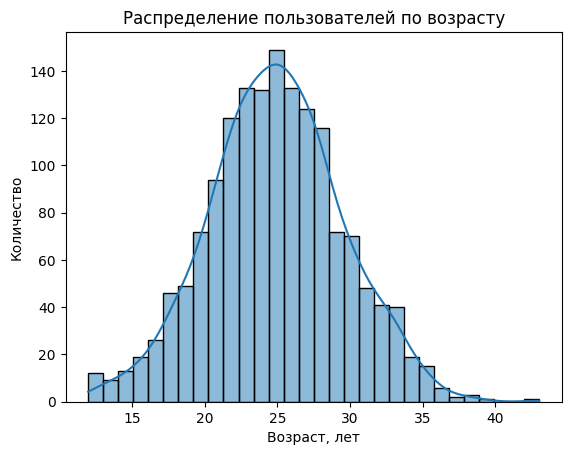

In [86]:
# датафрейм о пользователях `df_users`
# вывод первых 5 строк 
display(df_users.head(5))

# вывод основной информации
df_users.info()

# гистограмма для столбца `age`
sns.histplot(df_users['age'], kde=True)
plt.title('Распределение пользователей по возрасту')
plt.ylabel('Количество')
plt.xlabel('Возраст, лет')
plt.show()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


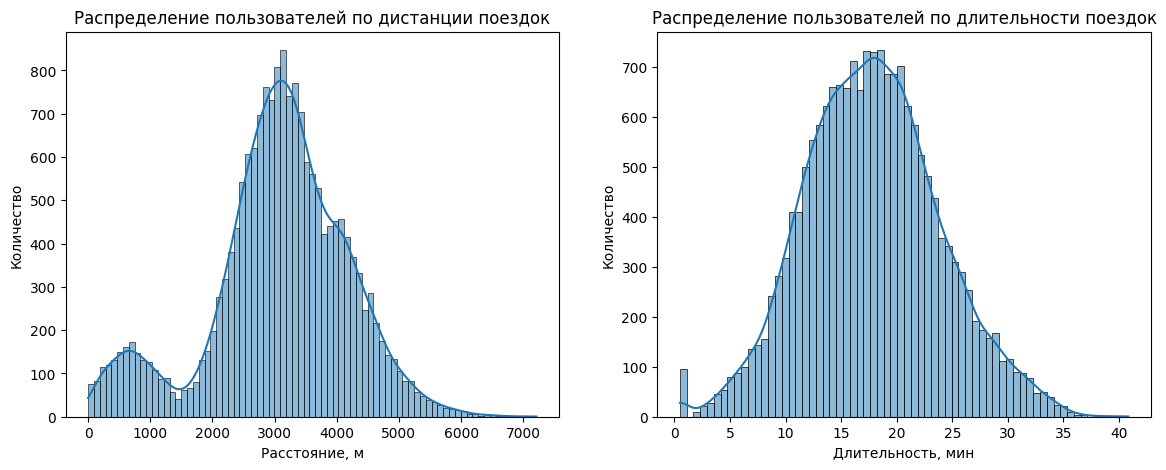

In [87]:
# датафрейм о поездках `df_rides`
# вывод первых 5 строчек 
display(df_rides.head(5))

# вывод основной информации
df_rides.info()

# гистограммы для столбцов 'distance' и 'duration'
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.title('Распределение пользователей по дистанции поездок')
plt.ylabel('Количество')
plt.xlabel('Расстояние, м')
sns.histplot(df_rides['distance'], kde=True)
plt.subplot(1, 2, 2)
plt.title('Распределение пользователей по длительности поездок')
plt.ylabel('Количество')
plt.xlabel('Длительность, мин')
sns.histplot(df_rides['duration'], kde=True)
plt.show()

In [88]:
# датафрейм о подписках `df_subscr`
# вывод всех строчек 
display(df_subscr.head())

# вывод основной информации
df_subscr.info()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


<div style="border:solid gray 1px; padding: 20px">

**Выводы:**
- в таблицах нет пропущенных значений
- есть выбросы и аномальные значения. Обработаем их в [п.3](#data_analysis)
- в столбце `date` таблицы `df_rides` необходимо изменить тип данных
- необходимо проверить таблицы на наличие дубликатов

## Предобработка данных

### Изменение типа данных

В столбце `date` таблицы `df_rides` необходимо изменить тип данных с текстового на DateTime для дальнейшего использования дня, месяца, года.

In [89]:
# изменение типа данных в столбце `first_day_exposition`
df_rides['date'] = \
pd.to_datetime(df_rides['date'], format='%Y-%m-%d')

Проверим результаты преобразования типов данных

In [90]:
# проверка изменения типов данных
df_rides['date'].dtypes

dtype('<M8[ns]')

### Добавление нового столбца

**Номер месяца совершения поездки**

Добавим в таблицу `df_rides` столбец `month` - номер месяца в который была совершена поездка. Получим месяц из информации о дате поездки `date`. Используем специальный атрибут `dt`. Сначала оценим период за который есть данные о поездках.

In [91]:
# вывод периода поездок
display(
    Markdown(
        f'В таблице поездок данные с **{df_rides["date"].min().date()}** по **{df_rides["date"].max().date()}**')
)

# добавление столбца `month_puplc`
df_rides['month'] = df_rides['date'].dt.month

В таблице поездок данные с **2021-01-01** по **2021-12-30**

### Проверка наличия пропущенных значений и дубликатов

Проверим наличие **пропущенных значений**:

In [92]:
# создание словаря датафреймов
dataframes = {'df_users': df_users, 'df_rides': df_rides, 'df_subscr': df_subscr}

# цикла для обработки датафреймов
for name, df in dataframes.items():
    if df.isna().sum().any():
        display(
            Markdown(
                f'Пропущенные значения в таблице: '
                f'**{df.isna().sum()}**')
        )
    else:
        display(
            Markdown(
                f'Нет пропущенных значений в таблице: '
                f'**{name}**')
        )

Нет пропущенных значений в таблице: **df_users**

Нет пропущенных значений в таблице: **df_rides**

Нет пропущенных значений в таблице: **df_subscr**

Проверим наличие **явных дубликатов**:

In [93]:
# вывод названий таблиц и количество дубликатов в них
for name, df in dataframes.items():
    if df.duplicated().sum() > 0:
        display(
            Markdown(
                f'**{df.duplicated().sum()}**'
                f' дубликатов строк в таблице: '
                f'{name}')
        )
    else:
        display(
            Markdown(
                f'Нет дубликатов в таблице: '
                f'{name}')
        )

**31** дубликатов строк в таблице: df_users

Нет дубликатов в таблице: df_rides

Нет дубликатов в таблице: df_subscr

Удалим явные дубликаты в таблице `df_users`

In [94]:
# удаление явных дубликатов, создание новых индексов и удаление старых
df_users = df_users.drop_duplicates().reset_index(drop=True)

<div style="border:solid gray 1px; padding: 20px">

**Возможные причины** появления явных дубликатов:
- Ошибка при формировании таблицы `df_users`
- Ошибка хранения информации в базе данных

<a id="data_analysis"></a>
## Исследовательский анализ данных

### Анализ частоты встречаемости городов

Проанализируем города из столбца `city` в таблице `df_users`

In [95]:
# количество городов в `city`
df_users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

In [96]:
# доля каждого города в `city`
(
    df_users['city']
    .value_counts(normalize=True)
    .apply(lambda x: f"{x:.2%}")
)

city
Пятигорск         14.28%
Екатеринбург      13.30%
Ростов-на-Дону    12.91%
Краснодар         12.58%
Сочи              12.32%
Омск              11.93%
Тюмень            11.73%
Москва            10.95%
Name: proportion, dtype: object

Покажем на линейчатой диаграмме распределение **пользователей по городам**

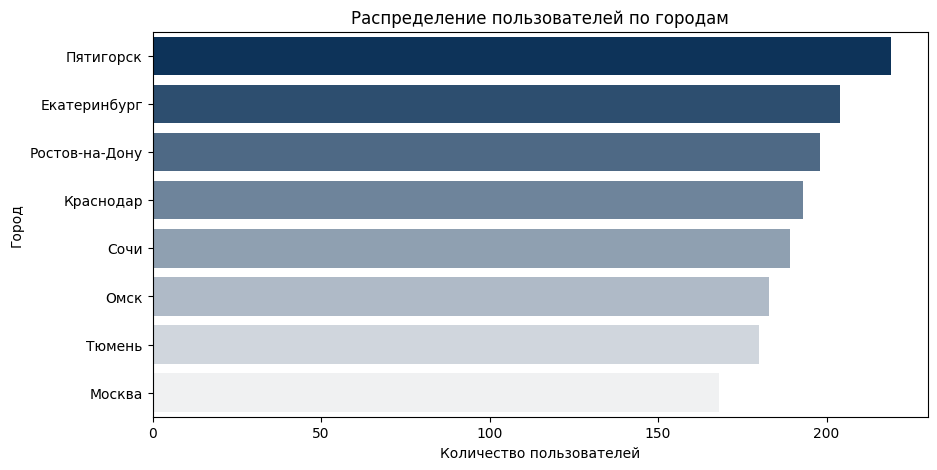

In [97]:
# получение уникальных городов
city_counts = df_users['city'].value_counts()
unique_cities = city_counts.index

# создание палитры - цвет столбца города зависит от частоты
palette = sns.light_palette("#003366", n_colors=len(unique_cities), reverse=True)

# размер графика
plt.figure(figsize=(10, 5))

# не смог одновременно использовать `hue` и `palette`
with warnings.catch_warnings(): 
    warnings.simplefilter(action='ignore', category=FutureWarning)
    # вывод линейчатой диаграммы для `city`
    sns.countplot(
        data=df_users, 
        y='city',
        orient='h',
        order=unique_cities,
        palette=palette,
    )
plt.title('Распределение пользователей по городам')
plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы**
1. В исходных данных больше всего пользователей из Пятигорска **14.28%** и меньше всего из Москвы **10.95%**
2. Вероятно сервис аренды самокатов GoFast в основном оказывает услуги в регионах Северного Кавказа и Западной Сибири

### Анализ соотношений пользователей с подпиской и без подписки

Проанализируем числовые значения из столбца `subscription_type` в таблице `df_users`

In [98]:
# количество пользователей по наличию подписки из `subscription_type`
df_users['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

In [99]:
# доля наличия подписки в `subscription_type`
(
    df_users["subscription_type"]
    .value_counts(normalize=True)
    .apply(lambda x: f"{x:.2%}")
)

subscription_type
free     54.43%
ultra    45.57%
Name: proportion, dtype: object

Круговая диаграмма распределения **пользователей по наличию подписки**

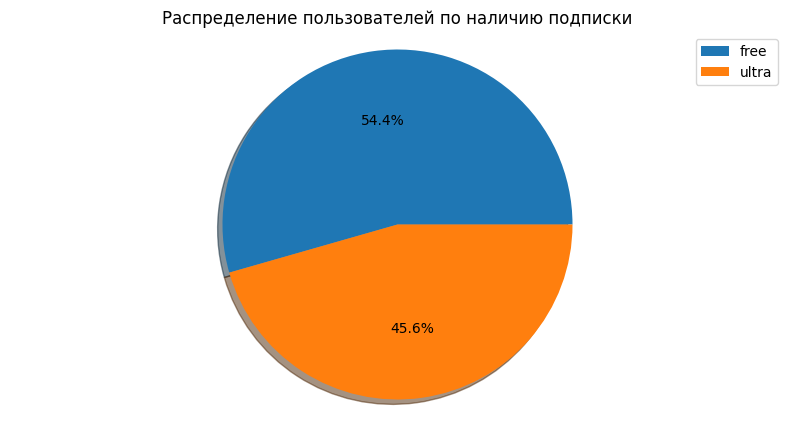

In [100]:
# вывод круговой диаграммы для`subscription_type` 
(
    df_users['subscription_type']
    .value_counts()
    .plot(
        kind='pie',
        grid=True,
        legend=True,
        figsize=(10,5),
        shadow=True,
        title='Распределение пользователей по наличию подписки',
        autopct='%1.1f%%',
        labels=None
    )
)
plt.axis('equal')
plt.axis('off') 
plt.show()

Числовая оценка распределения **пользователей по наличию подписки и городам**

In [101]:
# вывод сводной таблицы по городам/типу подписке
df_city_subscr = \
(
    df_users
    .pivot_table(index=['city', 'subscription_type'], values='user_id', aggfunc='count')
    .assign(
        subscription_rate=lambda x: round(x['user_id'] / x.groupby('city')['user_id'].transform('sum'), 2)
    )   
)
df_city_subscr.columns = ['Количество пользователей', 'Доля подписки']
df_city_subscr

Количество пользователей  Доля подписки
city           subscription_type                                         
Екатеринбург   free                                    112           0.55
               ultra                                    92           0.45
Краснодар      free                                    112           0.58
               ultra                                    81           0.42
Москва         free                                     84           0.50
               ultra                                    84           0.50
Омск           free                                     92           0.50
               ultra                                    91           0.50
Пятигорск      free                                    125           0.57
               ultra                                    94           0.43
Ростов-на-Дону free                                    109           0.55
               ultra                                    89           0.45
Сочи           free                                    103           0.54
               ultra                                    86           0.46
Тюмень         free                                     98           0.54
               ultra                                    82           0.46

Графическая оценка распределения **пользователей по наличию подписки и городам**

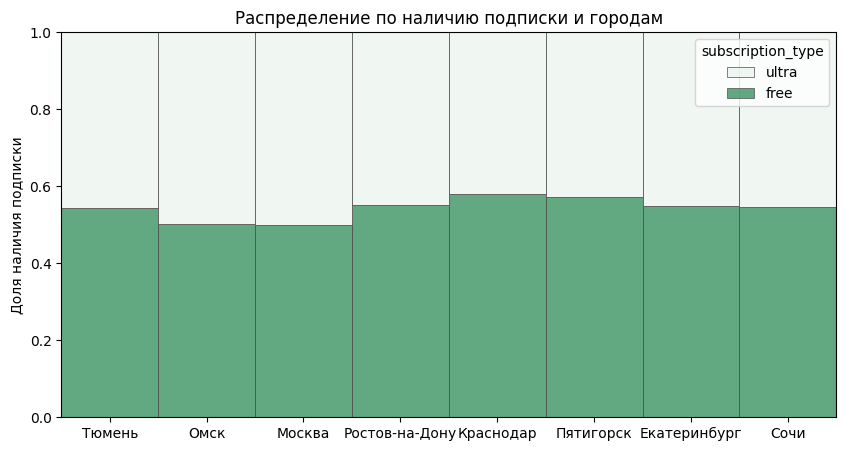

In [102]:
# вывод стековой столбчатой диаграммы для`city` и `subscription_type` 
plt.figure(figsize=(10, 5))

palette = sns.light_palette("seagreen", n_colors=2)
sns.histplot(
    df_users,
    x="city", 
    hue="subscription_type",
    multiple="fill",
    palette=palette,
    edgecolor=".3",
    linewidth=.5,
    stat='probability'
)
plt.title('Распределение по наличию подписки и городам')
plt.ylabel('Доля наличия подписки')
plt.xlabel('')
plt.show()

Графическая оценка распределения **пользователей по наличию подписки и возрасту**

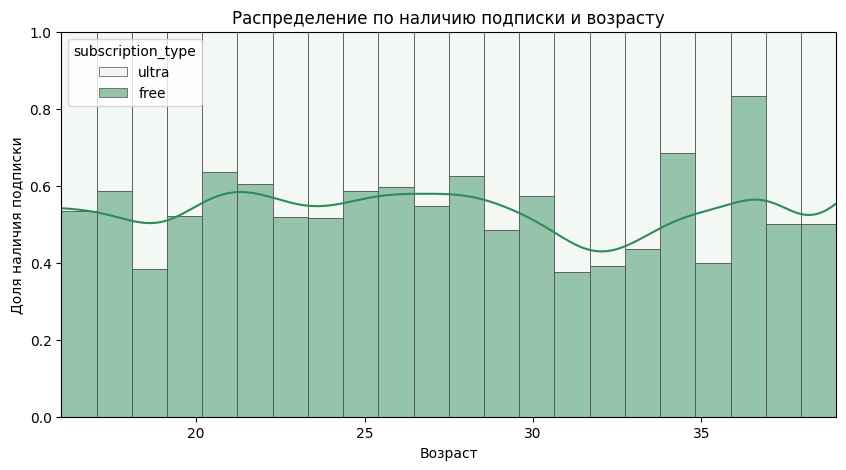

In [103]:
# фильтрация исходной таблицы от выбросов
df_users_filtered = df_users.query('16 <= age < 40')

# вывод стековой столбчатой диаграммы для `age` и `subscription_type` 
plt.figure(figsize=(10, 5))
palette = sns.light_palette("seagreen", n_colors=2)
sns.histplot(
    df_users_filtered,
    x="age", 
    hue="subscription_type",
    multiple="fill",
    palette=palette,
    edgecolor=".3",
    linewidth=.5,
    stat='probability',
    kde=True
)
plt.title('Распределение по наличию подписки и возрасту')
plt.ylabel('Доля наличия подписки')
plt.xlabel('Возраст')
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:** 
1. Общее соотношение пользователей с подпиской **45%** / без подписки **55%**
2. Распределение пользователей по наличию подписки и городам примерно такое же. Исключение Москва и Омск - с подпиской **51%** / без подписки **49%**
3. Пользователи в возрасте 19 лет и от 31 до 35 лет чаще оформляют подписку


### Анализ возраста пользователей

Проанализируем числовые значения возраста из столбца `age`

In [104]:
# числовое описание данных в `age`
df_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Гистограмма распределения **пользователей по возрасту**

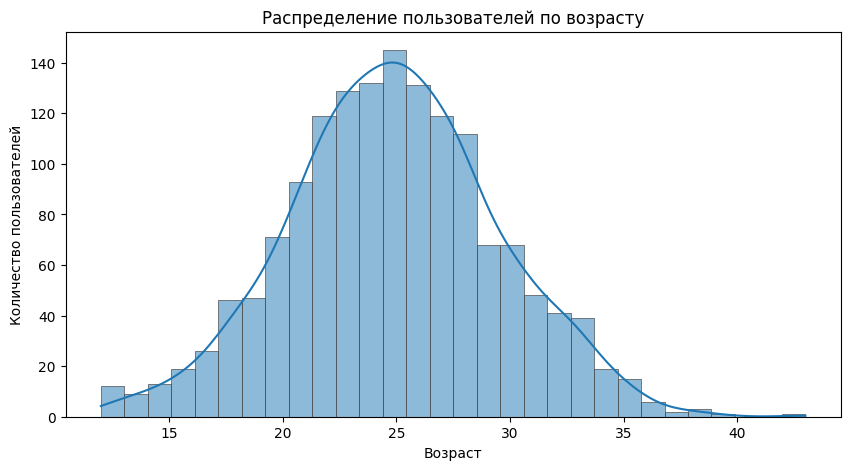

In [105]:
# вывод гистограммы для столбца`age`
plt.figure(figsize=(10, 5))
sns.histplot(
    df_users,
    x="age", 
    edgecolor=".3",
    linewidth=.5,
    kde=True
)
plt.title('Распределение пользователей по возрасту')
plt.ylabel('Количество пользователей')
plt.xlabel('Возраст')
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:** 
1. Распределение пользователей по возрасту близко к нормальному распределению
2. Cредний возраст пользователей **~25 лет**

### Анализ дистанции одной поездки

Проанализируем значения из столбца `distance`

In [106]:
# числовое описание данных в `distance`
df_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Гистограмма распределения **дистанции одной поездки**

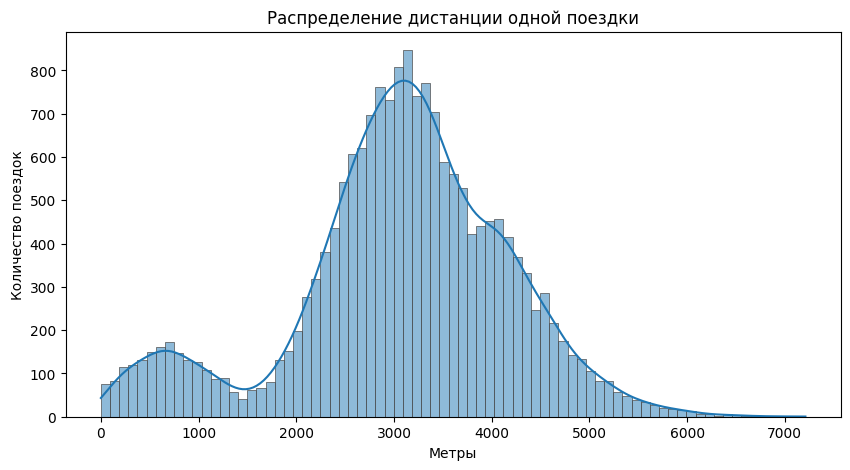

In [107]:
# вывод гистограммы для столбца `distance`
plt.figure(figsize=(10, 5))
sns.histplot(
    df_rides,
    x="distance", 
    edgecolor=".3",
    linewidth=.5,
    kde=True
)
plt.title('Распределение дистанции одной поездки')
plt.ylabel('Количество поездок')
plt.xlabel('Метры')
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:** 
1. Распределение дистанции одной поездки близко к нормальному распределению с аномальной второй вешиной слева
2. На данном этапе исследования невозможно определить причину аномально большого количества поездок на дистанции до **1500 м**. Вероятно пользователи пользуются сервисом без подписки для экономии на коротких поездках, например до ближайшей остановки общественного транспорта.
3. Такие аномальные поездки влияют на значение средней дистанции поездки **3071 м**. Оно смещено влево относительно медианы, равной **3134 м**

### Анализ длительности поездок

Проанализируем значения длительности поездок из столбца `duration`

In [108]:
# числовое описание данных в `duration`
df_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Проверим поездки длительностью **менее 2 мин**

In [109]:
# вывод 5-ти строк отфильтрованного `df_rides`
display(df_rides.query('duration < 2').head())

# вывод количества строк с `duration` менее 2 мин
display(
    Markdown(
        f'**{len(df_rides.query("duration < 2"))}**'
        f' строк с длительностью поездки менее 2 мин')
    
)
user_id_2min = df_rides.query('duration < 2')['user_id']

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2


**95** строк с длительностью поездки менее 2 мин

Учитывая аномально большую дистанцию поездок длительностью менее 2 мин - удалим строки с такими поездками.

In [110]:
# удаление строк со значением в столбце `duration`менее 2 мин
df_rides.drop(df_rides.query('duration < 2').index, inplace=True)

Гистограмма распределения **длительности одной поездки**

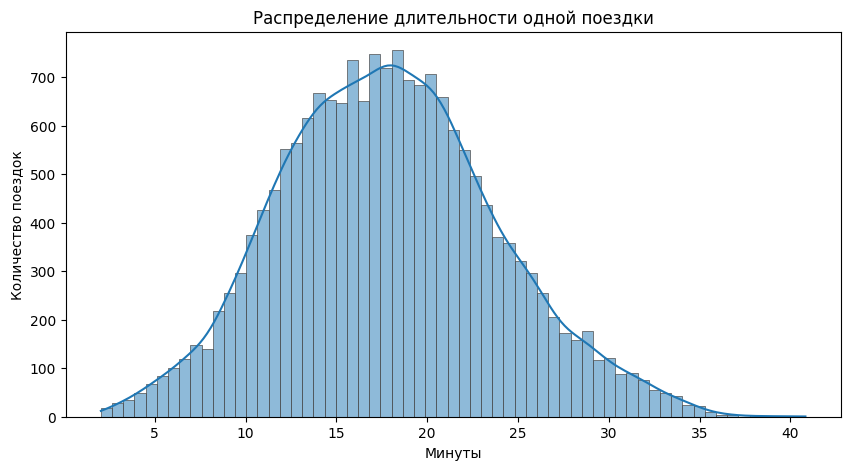

In [111]:
# вывод гистограммы для столбца `distance`
plt.figure(figsize=(10, 5))
sns.histplot(
    df_rides,
    x="duration", 
    edgecolor=".3",
    linewidth=.5,
    kde=True
)
plt.title('Распределение длительности одной поездки')
plt.ylabel('Количество поездок')
plt.xlabel('Минуты')
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:** 
1. Распределение длительности поездок близко к нормальному распределению со средним значением **~18 мин**
2. Строки с аномальными значениями длительности поездок удалены 

<a id="data_merge"></a>
## Объединение данных

<a id="factors"></a>
### Объединение данных о пользователях, поездках и подписках

Объединим данные:
- о пользователях из `df_users`,
- поездках из `df_rides` и
- подписках из `user_id` в новый  датафрейм `df_united`.

Для этого воспользуемся методом merge().

In [112]:
# объединение `df_users` и `df_rides` по столбцу`user_id` и запись в `df_united`
df_united = df_users.merge(df_rides, on='user_id', how='left')

# вывод 5-ти строк объединенной таблицы `df_united`
df_united.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8


In [113]:
# присоединение `df_subscr` к `df_united` по столбцу`subscription_type`
df_united = df_united.merge(df_subscr, on='subscription_type')

# вывод 5-ти строк объединенной таблицы `df_united`
df_united.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [114]:
# вывод основной информации объединенной таблицы `df_united`
df_united.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17973 entries, 0 to 17972
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   name               17973 non-null  object        
 2   age                17973 non-null  int64         
 3   city               17973 non-null  object        
 4   subscription_type  17973 non-null  object        
 5   distance           17973 non-null  float64       
 6   duration           17973 non-null  float64       
 7   date               17973 non-null  datetime64[ns]
 8   month              17973 non-null  int32         
 9   minute_price       17973 non-null  int64         
 10  start_ride_price   17973 non-null  int64         
 11  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. Объединили 3 исходные таблицы о пользователях, поездках и подписках в новый датафрейм `df_united`
2. При объединении использовали опцию `how='left'` - предполагая, что возможная потеря информации о поездках несуществующих пользователей "меньшая из зол"
   

<a id="create_data"></a>
### Создание 2-х новых датафреймов

Создадим ещё 2 датафрейма из датафрейма `df_united`
- c данными о пользователях без подписки `df_united_free`
- с данными о пользователях с подпиской `df_united_ultra`

In [125]:
# создание `df_united_free` из `df_united`
df_united_free = df_united.query('subscription_type == "free"')

# создание `df_united_ultra` из `df_united`
df_united_ultra = df_united.query('subscription_type == "ultra"')

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,25.0,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,16.0,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,15.0,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,16.0,2021-10-17,10,6,0,199


<div style="border:solid gray 1px; padding: 20px">

**Вывод:**

1. Разделили общий датафрейм `df_united` на две части `df_united_free` и `df_united_ultra` для дальнейшего анализа

### Визуализации без подписки / с подпиской

Посмотрим общее количество поездок без подписки / с подпиской и их долю

In [116]:
# количество поездок по типу подписки из `subscription_type`
df_united['subscription_type'].value_counts()

subscription_type
free     11473
ultra     6500
Name: count, dtype: int64

In [117]:
# доля наличия подписки в `subscription_type`
(
    df_united["subscription_type"]
    .value_counts(normalize=True)
    .apply(lambda x: f"{x:.2%}")
)

subscription_type
free     63.83%
ultra    36.17%
Name: proportion, dtype: object

Круговая диаграмма распределения **количества поездок по наличию подписки**

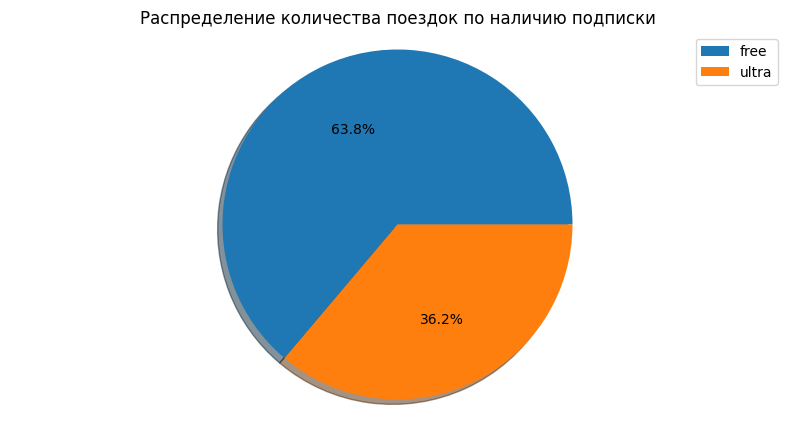

In [118]:
# вывод круговой диаграммы для`subscription_type` 
(
    df_united['subscription_type']
    .value_counts()
    .plot(
        kind='pie',
        grid=True,
        legend=True,
        figsize=(10,5),
        shadow=True,
        title='Распределение количества поездок по наличию подписки',
        autopct='%1.1f%%',
        labels=None
    )
)
plt.axis('equal')
plt.axis('off') 
plt.show()

Гистограммы распределения **дистанции поездок** для пользователей без подписки / с подпиской

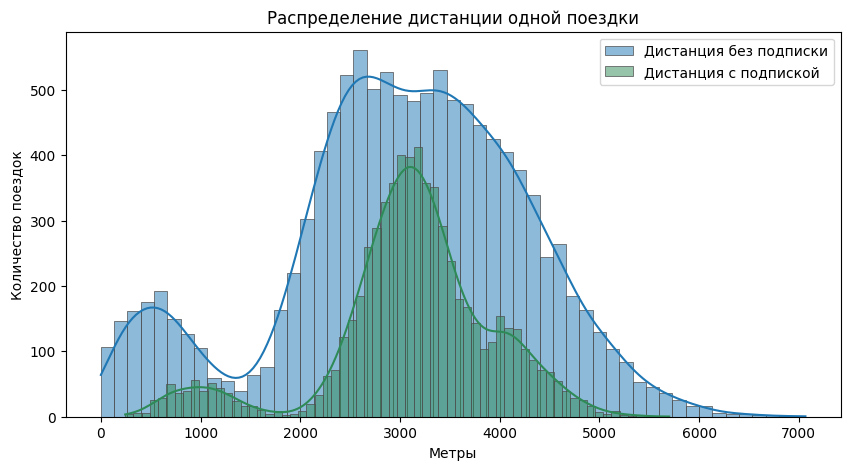

In [119]:
# задание размера графика
plt.figure(figsize=(10, 5))

# вывод гистограммы для `df_united_free`
sns.histplot(
    df_united_free,
    x="distance", 
    edgecolor=".3",
    linewidth=.5,
    label='Дистанция без подписки',
    kde=True
)

# вывод гистограммы для `df_united_ultra`
sns.histplot(
    df_united_ultra,
    x="distance", 
    edgecolor=".3",
    linewidth=.5,
    color='seagreen',
    label='Дистанция с подпиской',
    kde=True
)
plt.title('Распределение дистанции одной поездки')
plt.ylabel('Количество поездок')
plt.xlabel('Метры')
plt.legend()
plt.show()

Гистограммы распределения **длительности поездок** для пользователей без подписки / с подпиской

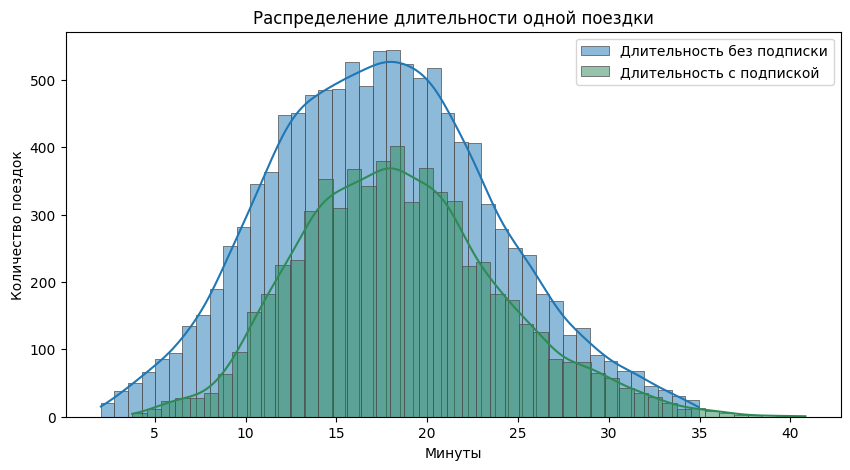

In [120]:
# задание размера графика
plt.figure(figsize=(10, 5))

# вывод гистограммы для `df_united_free`
sns.histplot(
    df_united_free,
    x="duration", 
    edgecolor=".3",
    linewidth=.5,
    label='Длительность без подписки',
    kde=True
)

# вывод гистограммы для `df_united_ultra`
sns.histplot(
    df_united_ultra,
    x="duration", 
    edgecolor=".3",
    linewidth=.5,
    color='seagreen',
    label='Длительность с подпиской',
    kde=True
)
plt.title('Распределение длительности одной поездки')
plt.ylabel('Количество поездок')
plt.xlabel('Минуты')
plt.legend()
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. Количество поездок:
   - без подписки **11473**
   - с подпиской **6500**
3. Доли поездок:
   - без подписки **63.83%**
   - с подпиской **36.17%**
5. Распределения длительности поездок без подписки / с подпиской близки к нормальному распределению со средним значением **~18 мин**
6. На дистанции до 1000 м пользователи без подписки преобладают.
7. Вероятно пользователи с подпиской стремятся к максимальной эффективности и удобству, а пользователи без подписки выбирают более короткие и менее длительные поездки для тестирования возможностей сервиса и из соображений экономии

<a id="revenue_calc"></a>
## Подсчёт выручки

### Создание агрегированного датафрейма

Создадим датафрейм с агрегированными данными по месяцам о поездках на основе объединённых данных из `df_united`. 

Найдём для каждого пользователя за каждый месяц:
- суммарное расстояние
- количество поездок
- суммарное время, предварительно округлив длительность каждой поездки `duration` в каждой строке `df_united` до ближайшего целого "вверх"

In [121]:
# округление значений в `duration` до "потолка"
df_united['duration'] = np.ceil(df_united['duration']) 

# создание `df_united_agg` с агрегированными данными
df_united_agg = \
(
    df_united
    .groupby(['user_id', 'month'])
    .agg({
        'duration': 'sum',
        'distance': ['sum', 'count']})
    .reset_index()
)
# переименование столбцов `df_united_agg`
df_united_agg.columns = ['user_id', 'month', 'duration', 'distance', 'count_rides']

# вывод 5-ти строк `df_united_agg`
df_united_agg.head()

,user_id,month,duration,distance,count_rides
0,1,1,42.0,7027.511294,2
1,1,4,7.0,754.159807,1
2,1,8,46.0,6723.470560,2
3,1,10,32.0,5809.911100,2
4,1,11,56.0,7003.499363,3


<a id="revenue_add"></a>
### Расчет и добавление выручки

В `df_united_agg` добавим столбец `revenue` с помесячной выручкой, которую принёс каждый пользователь. 

Для этого: 
- из `df_united` присоединим к `df_united_agg` нужные столбцы
- удалим образовавшиеся дублирующиеся строки равные количеству поездок каждого пользователя в месяц
- рассчитаем помесячную выручку по формуле:
   `start_ride_price` * `count_rides` + `minute_price` * `duration` + `subscription_fee`
- заменим числовые значения в `month` на названия месяцев

In [122]:
# присоединение столбцов `minute_price`, `start_ride_price`, `subscription_fee`
df_united_agg = \
(
    df_united_agg
    .merge(
        df_united[[
            'user_id',
            'subscription_type',
            'month', 
            'minute_price', 
            'start_ride_price', 
            'subscription_fee']], 
        on=[
            'user_id', 
            'month']
    )
)

# удаление дублей строк `user_id` в каждом `month`
df_united_agg = df_united_agg.drop_duplicates()

# рассчет помесячной выручки в столбец `revenue`
df_united_agg['revenue'] = \
(
    df_united_agg['start_ride_price'] * df_united_agg['count_rides'] + 
    df_united_agg['minute_price'] * df_united_agg['duration'] + 
    df_united_agg['subscription_fee']
)

# создание словаря для замены номеров месяца на названия
month_dict = {
    1: 'Январь', 
    2: 'Февраль', 
    3: 'Март', 
    4: 'Апрель', 
    5: 'Май', 
    6: 'Июнь', 
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь',
}

# замена номеров месяца на названия в `df_united_agg`
df_united_agg['month'] = df_united_agg['month'].map(month_dict)

# вывод 5-ти строк `df_united_agg`
df_united_agg.head()

,user_id,month,duration,distance,count_rides,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,Январь,42.0,7027.511294,2,ultra,6,0,199,451.0
2,1,Апрель,7.0,754.159807,1,ultra,6,0,199,241.0
3,1,Август,46.0,6723.470560,2,ultra,6,0,199,475.0
5,1,Октябрь,32.0,5809.911100,2,ultra,6,0,199,391.0
7,1,Ноябрь,56.0,7003.499363,3,ultra,6,0,199,535.0


<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. Создана итоговая таблица `df_united_agg` суммирующая данные о длительности, дистанции, количеству поездок и выручке помесячно по каждому пользователю 

<a id="testing_hypos"></a>
## Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для проведения различных акции нужно выяснить несколько важных моментов.

### Гипотеза о длительности поездок 

Выясним, **тратят ли пользователи с подпиской больше времени на поездки**? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Используем исходные данные о длительности каждой поездки — отдельно для подписчиков и тех, у кого нет подписки.

**H0** - нулевая гипотеза:
- пользователи с подпиской не тратят больше времени на поездки, чем пользователи без подписки

**H1** - альтернативная односторонняя гипотеза
- пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки

Проверим гипотезу с помощью t-теста для независимых выборок. Если вероятность ошибочно отвергнуть нулевую гипотезу `p-value` окажется меньше уровня статистической значимости `alpha = 5%`, то отвергнем нулевую гипотезу в пользу альтернативной.

Используем выборки `df_united_free` и `df_united_ultra`, созданные в [п.4.2.](#create_data) 

Оценим графически распределение средней длительности поездок, например **по возрастным группам**.

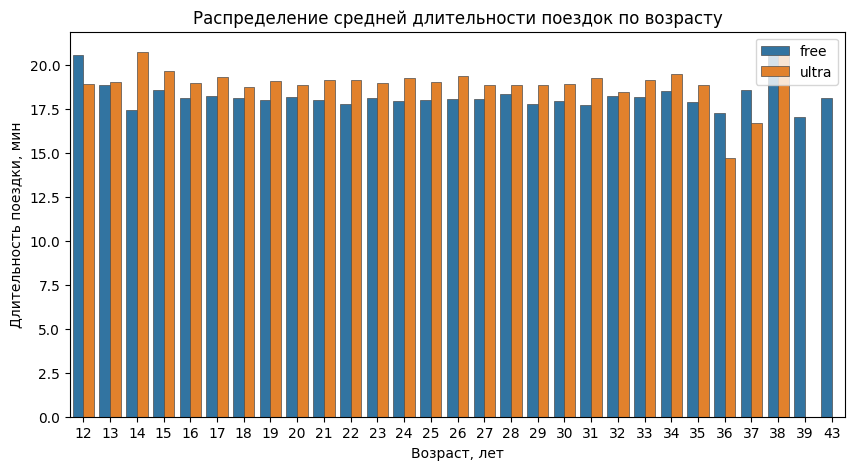

In [123]:
# создание сводной таблицы для графика
df_agg = \
(
    df_united
    .groupby(['subscription_type', 'age'])
    .agg({
        'duration': 'mean'})
    .reset_index()
)

# задание размера графика
plt.figure(figsize=(10, 5))

# вывод столбчатой диаграммы для `df_agg`
sns.barplot(
    data=df_agg,
    x="age",
    y="duration",
    edgecolor=".3",
    linewidth=.5,
    hue='subscription_type'
)
plt.title('Распределение средней длительности поездок по возрасту')
plt.ylabel('Длительность поездки, мин')
plt.xlabel('Возраст, лет')
plt.legend()
plt.show()

Визуальная оценка - средняя длительность поездок пользователей с подпиской больше, чем у пользователей без подписки. Проверим гипотезу t-тестом.

In [124]:
# задание уровня статистической значимости
alpha = 0.05

# выполнение t-теста с односторонней альтернативной гипотезой
t_stat, p_value = st.ttest_ind(df_united_ultra['duration'], df_united_free['duration'], alternative='greater')

# проверка гипотезы
if p_value < alpha:
    display(
        Markdown(
            f'p_value=**{p_value:.2e}** < {alpha:.2%}\n\n'
            f' Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки.'
        )
    )
else:
    display(
        Markdown(
            f'p_value=**{p_value:.2%}** >= {alpha:.2%}\n\n'
            f' Не удалось отвергнуть нулевую гипотезу: нет достаточных доказательств,\
            что пользователи с подпиской тратят больше времени на поездки.'
        )
    )

p_value=**4.70e-28** < 5.00%

 Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки.

<div style="border:solid gray 1px; padding: 20px">

**Вывод:** 

1. Пользователи **с подпиской тратят больше времени на поездки**, чем пользователи без подписки

### Гипотеза о средней дистанции

Оптимальное расстояние одной поездки с точки зрения износа самоката: **3130 метров**. Можно ли утверждать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

**H0** - нулевая гипотеза:
- дистанция поездок пользователей с подпиской за одну поездку не превышает 3130 м

**H1** - альтернативная односторонняя гипотеза
- дистанция поездок пользователей с подпиской за одну поездку превышает 3130 м

Проверим гипотезу с помощью t-теста односторонних гипотез. Если вероятность ошибочно отвергнуть нулевую гипотезу `p-value` окажется меньше уровня статистической значимости `alpha = 5%`, то отвергнем нулевую гипотезу в пользу альтернативной.

Используем выборку`df_united_ultra`, созданную в [п.4.2.](#create_data). Оценим графически распределение средней дистанции поездок пользователей с подпиской, например **по возрастным группам**. 

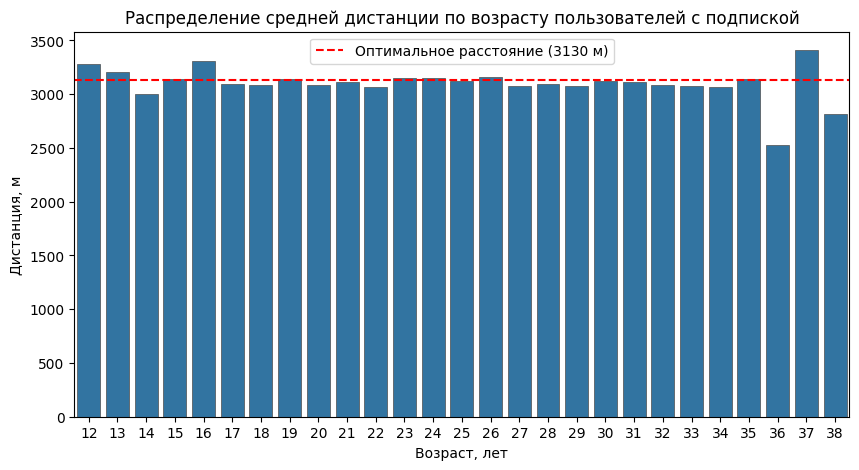

In [144]:
# создание сводной таблицы для графика
df_agg = \
(
    df_united_ultra
    .groupby(['subscription_type', 'age'])
    .agg({
        'distance': 'mean'})
    .reset_index()
)

# задание размера графика
plt.figure(figsize=(10, 5))

# вывод столбчатой диаграммы для `df_agg`
sns.barplot(
    data=df_agg,
    x="age",
    y="distance",
    edgecolor=".3",
    linewidth=.5,
)

# добавление линии для оптимального расстояния
plt.axhline(
    y=3130, 
    color='r', 
    linestyle='--', 
    label=f'Оптимальное расстояние (3130 м)')
    
plt.title('Распределение средней дистанции по возрасту пользователей с подпиской')
plt.ylabel('Дистанция, м')
plt.xlabel('Возраст, лет')
plt.legend()
plt.show()

Визуальная оценка - средняя дистанция поездок пользователей с подпиской не превышает 3130 м. Проверим гипотезу t-тестом.

In [142]:
# задание уровня статистической значимости
alpha = 0.05

# оптимальная дистанция
interested_distance = 3130

# выполнение t-теста с односторонней альтернативной гипотезой
t_stat, p_value = st.ttest_1samp(df_united_ultra['distance'], interested_distance, alternative='greater')

# проверка гипотезы
if p_value < alpha:
    display(
        Markdown(
            f'p_value=**{p_value:.2e}** < {alpha:.2%}\n\n'
            f' Отвергаем нулевую гипотезу: дистанция поездок пользователей с подпиской превышает 3130 м.'
        )
    )
else:
    display(
        Markdown(
            f'p_value=**{p_value:.2%}** > {alpha:.2%}\n\n'
            f' Не удалось отвергнуть нулевую гипотезу: \
            дистанция поездок пользователей с подпиской  **не превышает {interested_distance} м**.'
        )
    )

p_value=**91.95%** > 5.00%

 Не удалось отвергнуть нулевую гипотезу:             дистанция поездок пользователей с подпиской  **не превышает 3130 м**.

<div style="border:solid gray 1px; padding: 20px">

**Вывод:** 

1. Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, **не превышает оптимальное расстояние 3130 метров**

### Гипотеза о помесячной выручке

Проверим гипотезу о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

**H0** - нулевая гипотеза:
- помесячная выручка от пользователей с подпиской не выше, чем от пользователей без подписки

**H1** - альтернативная односторонняя гипотеза
- помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки

Проверим гипотезу с помощью t-теста для независимых выборок. Если `p-value` окажется меньше уровня статистической значимости `alpha = 5%`, то отвергнем нулевую гипотезу в пользу альтернативной.

Используем выборку с помесячной выручкой `df_united_agg`, созданную в [п.5.2](#revenue_add), и разделим ее на две выборки - пользователи с подпиской `df_ultra_agg`и без подписки `df_free_agg`

Оценим графически распределение **средней помесячной выручки пользователей** с подпиской / без подписки по месяцам.

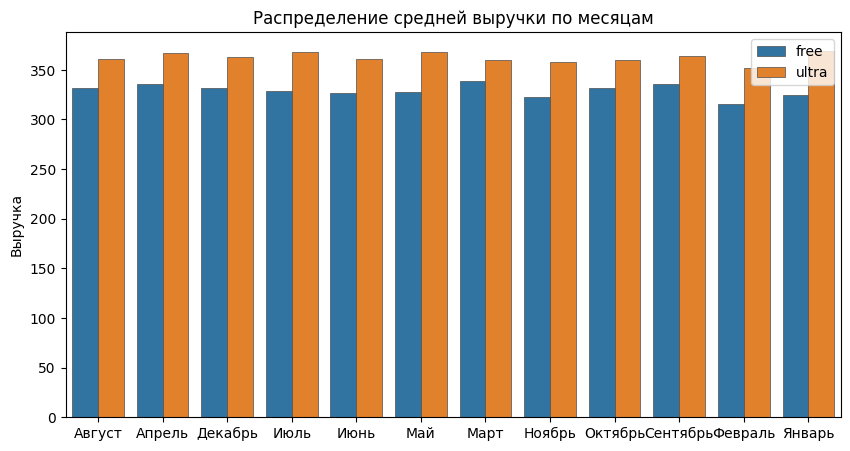

In [43]:
# создание сводной таблицы для графика
df_agg = \
(
    df_united_agg
    .groupby(['subscription_type', 'month'])
    .agg({
        'revenue': 'mean'})
    .reset_index()
)

# задание размера графика
plt.figure(figsize=(10, 5))

# вывод столбчатой диаграммы для `df_agg`
sns.barplot(
    data=df_agg,
    x="month",
    y="revenue",
    edgecolor=".3",
    linewidth=.5,
    hue='subscription_type'
)
plt.title('Распределение средней выручки по месяцам')
plt.ylabel('Выручка')
plt.xlabel('')
plt.legend()
plt.show()

Визуальная оценка - средняя помесячная выручка от пользователй с подпиской превышает выручку от пользователей без подписки.

Проверим гипотезу с помощью t-теста для независимых выборок.

In [145]:
# создание `df_ultra_agg` из `df_united_agg`
df_ultra_agg = df_united_agg.query('subscription_type == "ultra"')

# создание `df_free_agg` из `df_united_agg`
df_free_agg = df_united_agg.query('subscription_type == "free"')

# задание уровня статистической значимости
alpha = 0.05

# выполнение t-теста с односторонней альтернативной гипотезой
t_stat, p_value = st.ttest_ind(df_ultra_agg['revenue'], df_free_agg['revenue'], alternative='greater')

# проверка гипотезы
if p_value < alpha:
    display(
        Markdown(
            f'p_value=**{p_value:.2e}** < {alpha:.2%}\n\n'
            f' Отвергаем нулевую гипотезу: помесячная выручка от пользователей с подпиской выше,\
            чем от пользователей без подписки.'
        )
    )
else:
    display(
        Markdown(
            f'p_value=**{p_value:.2%}** >= {alpha:.2%}\n\n'
            f' Не удалось отвергнуть нулевую гипотезу: нет достаточных доказательств,\
            что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.'
        )
    )

p_value=**2.03e-30** < 5.00%

 Отвергаем нулевую гипотезу: помесячная выручка от пользователей с подпиской выше,            чем от пользователей без подписки.

<div style="border:solid gray 1px; padding: 20px">

**Вывод:** 

1. Помесячная выручка от пользователей с подпиской по месяцам **выше**, чем выручка от пользователей без подписки. 

<a id="localities"></a>
### Гипотеза о количестве обращений в техподдержку

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Команда ожидает значимого снижения количества обращений в техподдержку. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 

Какой тест необходимо провести для проверки этой гипотезы?

Для проверки гипотезы необходимо провести **парный t-тест** для сравнения двух связанных выборок. Тест проверяет - есть ли статистически значимая разница между их средними значениями до и после изменений (обновления серверов).

**H0** - нулевая гипотеза:
- среднее количество обращений в техподдержку после обновления серверов не изменилось

**H1** - альтернативная односторонняя гипотеза
- среднее количество обращений в техподдержку после обновления серверов меньше, чем до обновления

Смоделируем возможную ситуацию и проверим гипотезу.

In [45]:
# формирование случайного набора данных
# обращения до обновления
calls_before = st.norm.rvs(loc=10,scale=20,size=500)

# обращения после первого обновления
calls_after1 = (calls_before + st.norm.rvs(loc=5,scale=20,size=500))    

# обращения после второго обновления
calls_after2 = (calls_before - st.norm.rvs(loc=5,scale=20,size=500)) 

# создание функции для проведения теста
def test_calls(calls_before, calls_after, n_update):
    
    # задание уровня статистической значимости
    alpha = 0.05

    # выполнение парного t-теста с односторонней альтернативной гипотезой
    t_statistic, p_value = st.ttest_rel(calls_before, calls_after, alternative='greater')
    
    # проверка гипотезы
    if p_value < alpha:
        display(
            Markdown(
                f'p_value=**{p_value:.2e}** < {alpha:.2%}\n\n'
                f' Отвергаем нулевую гипотезу: количество обращений в техподдержку\
                после **{n_update}** обновления серверов уменьшилось.'
            )
        )
    else:
        display(
            Markdown(
                f'p_value=**{p_value:.2%}** >= {alpha:.2%}\n\n'
                f' Не удалось отвергнуть нулевую гипотезу: нет достаточных доказательств,\
                что количество обращений в техподдержку после **{n_update}** обновления серверов уменьшилось.'
            )
        )

# вызов функции для проверки первого обновления серверов
test_calls(calls_before, calls_after1, 'первого')

# вызов функции для проверки второго обновления серверов
test_calls(calls_before, calls_after2, 'второго')

p_value=**100.00%** >= 5.00%

 Не удалось отвергнуть нулевую гипотезу: нет достаточных доказательств,                что количество обращений в техподдержку после **первого** обновления серверов уменьшилось.

p_value=**5.15e-09** < 5.00%

 Отвергаем нулевую гипотезу: количество обращений в техподдержку                после **второго** обновления серверов уменьшилось.

<div style="border:solid gray 1px; padding: 20px">

**Вывод:** 

1. Для проверки гипотезы по изменению количества обращений в техподдержку после обновления серверов можно использовать **парный t-тест** для сравнения двух связанных выборок

<a id="dop_marceting"></a>
## Дополнительные исследования для маркетинга

### Необходимое количество промокодов

Отделу маркетинга GoFast поставили задачу:
- нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 (`k=100`) существующих клиентов должны продлить эту подписку. То есть **получить 100 и более продлений подписки**.

По завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % (`p=0.1`) пользователей. 

Необходимо:
- выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 % (`alpha=0.05`)
- подобрать параметры распределения, описывающего эту ситуацию
- построить график распределения
- сформулировать ответ на вопрос о количестве промокодов (`n`)

Задача описывается биноминальным распределением. Построим кумулятивную функцию распределения вероятности (CDF) для биноминального распределения. Функция определяет вероятность, что случайная величина окажется меньше заданного значения или равна ему. А по условию задачи нужно определить вероятность что величина будет больше (правый хвост). Поэтому искомая вероятность будет равна `1 - CDF` 

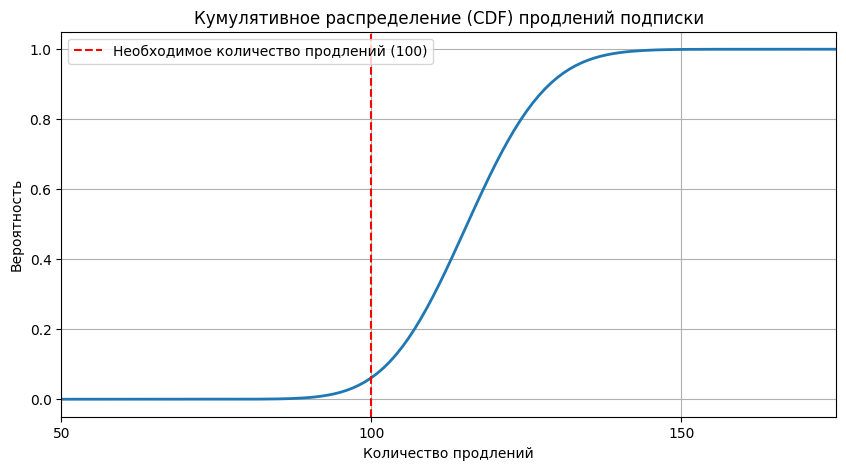

Необходимо выдать не менее **1161** промокодов для получения **100** и более продлений подписки с вероятностью не выполнить план **4.98%**

In [187]:
p_renewal = 0.1 # вероятность продления подписки
target_clients = 100 # необходимое количество продлений
n = 100 # начальное количество промокодов - не менее target_clients
alpha = 0.05 # уровень статистической значимости

# # цикл для поиска достаточного количества промокодов 
while binom.cdf(target_clients - 1, n, p_renewal) > 0.05:
    n += 1

# формирование значений кумулятивной функции для графика    
x = np.arange(0, n + 1)
binom_cdf = st.binom.cdf(x, n, p_renewal) 
# создание датафрейма для графика
data = pd.DataFrame({
    'Количество продлений': x,
    'Вероятность': binom_cdf
})

# построение графика
plt.figure(figsize=(10, 5))
sns.lineplot(
    x='Количество продлений', 
    y='Вероятность', 
    data=data,
    linewidth=2)

# добавление вертикальной линии для необходимого количества продлений
plt.axvline(
    x=k, 
    color='r', 
    linestyle='--', 
    label=f'Необходимое количество продлений ({k})'
)
plt.title('Кумулятивное распределение (CDF) продлений подписки')
plt.xlabel('Количество продлений')
plt.ylabel('Вероятность')
plt.legend(loc='upper left')
plt.grid()
plt.xticks(ticks=np.arange(0, n + 50, 50))
plt.xlim(50, k + 75)
plt.show()

# вывод на экран итоговых значений
display(
    Markdown(
        f'Необходимо выдать не менее **{n}** промокодов для '
        f'получения **{k}** и более продлений подписки '
        f'с вероятностью не выполнить план **{st.binom.cdf(target_clients - 1, n, p_renewal):.2%}**'
    )
)

Покажем на графике биноминальное распределение продления подписки для найденного количества промокодов

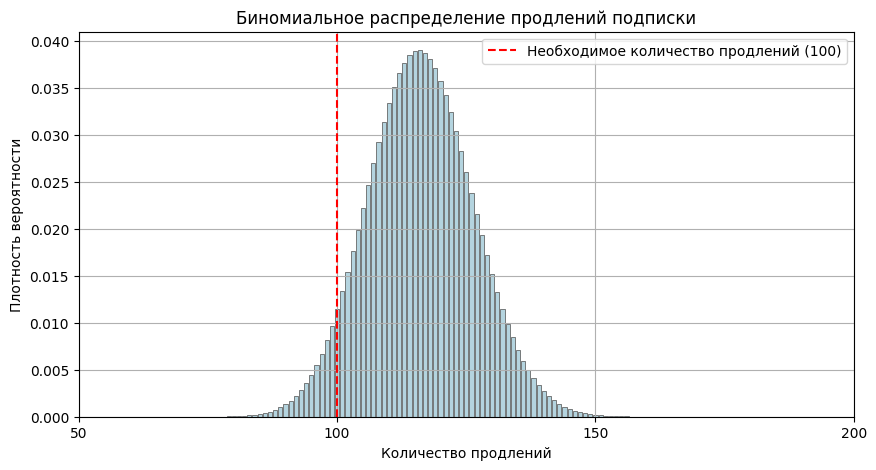

In [147]:
p = 0.1 # вероятность продления подписки
n = 1161 # количество промокодов
k = 100 # необходимое количество продлений

# создание массива для получения вероятностей
x = np.arange(0, n + 1)

# получение вероятностей биномиального распределения для массива х
with np.errstate(divide='ignore'):
    binom_pmf = st.binom.pmf(x, n, p)
    
# создание датафрейма для графика
data = pd.DataFrame({
    'Количество продлений': x,
    'Вероятность': binom_pmf
})

# построение графика
plt.figure(figsize=(10, 5))
sns.barplot(
    x='Количество продлений', 
    y='Вероятность', 
    data=data, 
    edgecolor=".3",
    color='lightblue',
    linewidth=.5)

# добавление вертикальной линии для необходимого количества продлений
plt.axvline(
    x=k, 
    color='r', 
    linestyle='--', 
    label=f'Необходимое количество продлений ({k})'
)

plt.title('Биномиальное распределение продлений подписки')
plt.xlabel('Количество продлений')
plt.ylabel('Плотность вероятности')
plt.legend(loc='upper right')
plt.grid()
plt.xticks(ticks=np.arange(0, n + 50, 50))
plt.xlim(50, k + 100)
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:** 

1. Отделу маркетинга нужно выдать не менее **1161** промокодов для достижения плана с заданной вероятностью
2. Для уменьшения количества промокодов необходимо увеличивать конверсию из бесплатного периода в продление подписки
4. График биноминального распределения показывает, что примерно 95% всех продлений находятся правее необходимого количества. И значит вероятность не выполнить план составляет примерно 5%

### Рассылка push-уведомлений

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % (`p=0.4`) получивших клиентов. Отдел планирует разослать 1 млн (`n=1000000`) уведомлений.

Необходимо:
- c помощью аппроксимации построить примерный график распределения
- оцените вероятность того, что уведомление откроют не более 399,5 тыс (`k=399500`) пользователей

Задача описывается биноминальным распределением. Но считать каждое отдельное значение `n` долго. Используем нормальную аппроксимацию биномиального распределения и кумулятивную функцию распределения вероятности (CDF) для оценки вероятности. Функция определяет вероятность, что случайная величина окажется меньше заданного значения или равна ему. И подходит условию задачи - нужно определить вероятность того, что величина будет не более заданного значения (левый хвост). 

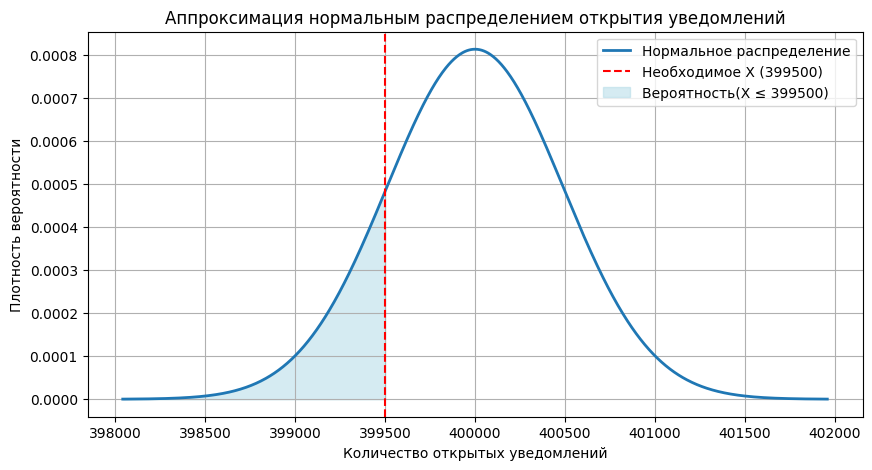

Вероятность того, что уведомление откроют не более **399,5 тыс** пользователей: **15.37%**

In [49]:
p = 0.4 # вероятность открытия уведомления
n = 1000000 # количество уведомлений
X = 399500 # необходимое количество открытия уведомлений
mu = n * p # мат.ожидание номального распределения
sigma = np.sqrt(n * p * (1 - p)) # ст.отклонение нормального распределения

# проверка условия аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    # создание нормального распределения
    norm_distr = st.norm(mu, sigma)
    
    # расчет вероятности хвоста слева от X
    P_X = norm_distr.cdf(X)
    
    # создание функции и датафрейма для графика
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    norm_pdf = st.norm.pdf(x, mu, sigma)
    data = pd.DataFrame({
        'Количество открытых уведомлений': x,
        'Плотность вероятности': norm_pdf
    })
    
    # построение графика
    plt.figure(figsize=(10, 5))
    sns.lineplot(
        x='Количество открытых уведомлений', 
        y='Плотность вероятности', 
        data=data,
        label='Нормальное распределение',
        linewidth=2)
    
    # добавление вертикальной линии для необходимого количества открытия уведомлений
    plt.axvline(
        x=X, 
        color='r', 
        linestyle='--', 
        label=f'Необходимое X ({X})'
    )
    plt.fill_between(x, norm_pdf, where=(x <= X), color='lightblue', alpha=0.5, label=f'Вероятность(X ≤ {X})')
    plt.title('Аппроксимация нормальным распределением открытия уведомлений')
    plt.xlabel('Количество открытых уведомлений')
    plt.ylabel('Плотность вероятности')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()
    
    # вывод на экран итоговых значений
    display(
        Markdown(
            f'Вероятность того, что уведомление откроют не более **399,5 тыс** пользователей:'
            f' **{P_X:.2%}**'
        )
    )    
else:
    display(
        Markdown(
            f'Не выполняется условие аппроксимации! Расчет вероятности остановлен'
        )
    )

<div style="border:solid gray 1px; padding: 20px">

**Выводы:** 

1. С заданными условиями вероятности `p=0.4` открытия уведомлений и количеством `n=1000000` уведомлений биноминальное распределение хорошо аппроксимируется нормальным распределением
2. Вероятность того, что уведомление откроют не более 399,5 тыс пользователей оставляет **15.37%**

<a id="research_results"></a>
## Итоги исследования

Результаты исследования данных о пользователях сервис аренды самокатов GoFast могут быть использованы продакт-менеджерами и маркетологами для выработки эффективных мероприятий, направленных на увеличение бизнеса. 

**Установлено**:


1. В исходных данных больше всего пользователей из Пятигорска **14.28%** и меньше всего из Москвы **10.95%**
2. Распределение наличия подписки по городам:
   - с подпиской **45%**
   - без подписки **55%** пользователей
   - исключение Москва и Омск - с подпиской **51%** / без подписки **49%**
4. Cредний возраст пользователей **~25 лет**
5. Средняя дистанция поездки **3071 м**. На дистанции до 1000 м преобладают пользователи без подписки 
6. Соотношение количества поездок:
   - без подписки **63.83%**
   - с подпиской **36.17%**
2. Распределения длительности поездок без подписки / с подпиской близки к нормальному распределению со средним значением **~18 мин**
4. Пользователи **с подпиской тратят больше времени на поездки**, чем пользователи без подписки
5. Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, **не превышает оптимальное расстояние 3130 метров**
6. Помесячная **выручка от пользователей с подпиской выше**, чем выручка от пользователей без подписки.
7. Отделу маркетинга нужно выдать не менее **1161** промокодов для достижения плана с заданной вероятностью примерно 5 %
8. Вероятность того, что push-уведомления в мобильном приложении откроют не более 399,5 тыс пользователей оставляет **15.37%**

   
**Рекомендации**:

1. Увеличивать долю поездок пользователей с подпиской (текущая **36,17%**) поскольку пользователи с подпиской более "выгодны" для компании
2. Использовать дополнительные методы для увеличения конверсии в продление подписки после бесплатного периода. Увеличение конверсии на 1 п.п. уменьшает примерно на 100 количество промокодов к выдаче
3. Исследовать и исключить возможные причины появления явных дубликатов в таблице о пользователях `df_users`
4. Провести дополнительное исследование о сезонности количества, дистанции и длительности поездок
5. Провести дополнительное исследование зависимости количества, дистанции и длительности поездок от возраста

[Вернуться в начало](#intro)